--- Step 1: Uploading Customer.csv ---


Saving Customer.csv to Customer (2).csv

--- Step 2: Data Loading from uploaded file ---
Customer (2).csv loaded into DataFrame.
Dataset head:
    Index      Customer Id First Name Last Name  \
0      1  DD37Cf93aecA6Dc     Sheryl    Baxter   
1      2  1Ef7b82A4CAAD10    Preston    Lozano   
2      3  6F94879bDAfE5a6        Roy     Berry   
3      4  5Cef8BFA16c5e3c      Linda     Olsen   
4      5  053d585Ab6b3159     Joanna    Bender   

                           Company               City  \
0                  Rasmussen Group       East Leonard   
1                      Vega-Gentry  East Jimmychester   
2                    Murillo-Perry      Isabelborough   
3  Dominguez, Mcmillan and Donovan         Bensonview   
4         Martin, Lang and Andrade     West Priscilla   

                      Country                 Phone 1                Phone 2  \
0                       Chile            229.077.5154       397.884.0519x718   
1                    Djibouti              515343577

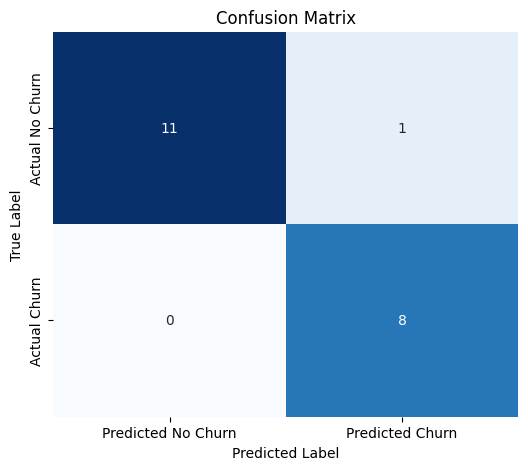


Cross-Entropy Error (Log Loss) on Test Set: 0.2663
Accuracy on Test Set: 0.9500
Precision on Test Set: 0.8889
Recall on Test Set: 1.0000
F1-Score on Test Set: 0.9412

--- Step 6: 10-Fold Cross-Validation ---
Fold 1/10 - Accuracy: 1.0000, Log Loss: 0.1269
Fold 2/10 - Accuracy: 1.0000, Log Loss: 0.1914
Fold 3/10 - Accuracy: 1.0000, Log Loss: 0.0972
Fold 4/10 - Accuracy: 1.0000, Log Loss: 0.1563
Fold 5/10 - Accuracy: 1.0000, Log Loss: 0.0967
Fold 6/10 - Accuracy: 1.0000, Log Loss: 0.1714
Fold 7/10 - Accuracy: 1.0000, Log Loss: 0.1937
Fold 8/10 - Accuracy: 1.0000, Log Loss: 0.1294
Fold 9/10 - Accuracy: 0.8000, Log Loss: 0.2335
Fold 10/10 - Accuracy: 1.0000, Log Loss: 0.1761

Average Accuracy (10-Fold CV): 0.9800 (+/- 0.0600)
Average Precision (10-Fold CV): 0.9600 (+/- 0.1200)
Average Recall (10-Fold CV): 1.0000 (+/- 0.0000)
Average F1-Score (10-Fold CV): 0.9750 (+/- 0.0750)
Average Cross-Entropy Error (10-Fold CV): 0.1573 (+/- 0.0422)

--- Analysis Complete ---


In [1]:
print("--- Step 1: Uploading Customer.csv ---")
from google.colab import files
import io
uploaded = files.upload()
if not uploaded:
    print("Error: No file was uploaded. Please ensure you select a file.")
    exit()

uploaded_filename = list(uploaded.keys())[0]
if 'Customer.csv' not in uploaded and uploaded_filename != 'Customer.csv':
    print(f"Warning: Expected 'Customer.csv' but found '{uploaded_filename}'. Using '{uploaded_filename}'.")
else:
    print(f"'{uploaded_filename}' uploaded successfully.")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, log_loss, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
print("\n--- Step 2: Data Loading from uploaded file ---")
df = pd.read_csv(io.BytesIO(uploaded[uploaded_filename]))
print(f"{uploaded_filename} loaded into DataFrame.")
print("Dataset head:\n", df.head())
print("\nDataset info:")
df.info()
print("\n--- Step 3: Preprocessing ---")
df['Subscription Date'] = pd.to_datetime(df['Subscription Date'])
churn_threshold_date = pd.to_datetime('2021-01-01')
df['Churn'] = (df['Subscription Date'] < churn_threshold_date).astype(int)
print(f"\nSynthetically created 'Churn' column. Churn rate: {df['Churn'].mean():.2f}").
features = ['Country', 'Subscription Date']
target = 'Churn'
df_processed = df[features + [target]].copy()
current_date = df_processed['Subscription Date'].max()
df_processed['Subscription_Duration_Days'] = (current_date - df_processed['Subscription Date']).dt.days
df_processed = df_processed.drop(columns=['Subscription Date'])
categorical_features = ['Country']
numerical_features = ['Subscription_Duration_Days']
print("\nChecking for missing values after initial selection:")
print(df_processed.isnull().sum())
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
X = df_processed.drop(columns=[target])
y = df_processed[target]

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("Preprocessing complete. Data ready for modeling.")
print("\n--- Step 4 & 5: Model Training and Initial Evaluation ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(solver='liblinear', random_state=42))])
print("Training Logistic Regression model...")
model_pipeline.fit(X_train, y_train)
print("Model training complete.")
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
ce_error = log_loss(y_test, y_pred_proba)
print(f"\nCross-Entropy Error (Log Loss) on Test Set: {ce_error:.4f}")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy on Test Set: {accuracy:.4f}")
print(f"Precision on Test Set: {precision:.4f}")
print(f"Recall on Test Set: {recall:.4f}")
print(f"F1-Score on Test Set: {f1:.4f}")

print("\n--- Step 6: 10-Fold Cross-Validation ---")

n_splits = 10
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
logloss_scores = []

fold_num = 1
for train_index, val_index in kf.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]


    fold_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', LogisticRegression(solver='liblinear', random_state=42))])
    fold_pipeline.fit(X_train_fold, y_train_fold)


    y_pred_fold = fold_pipeline.predict(X_val_fold)
    y_pred_proba_fold = fold_pipeline.predict_proba(X_val_fold)[:, 1]


    accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
    precision_scores.append(precision_score(y_val_fold, y_pred_fold, zero_division=0))
    recall_scores.append(recall_score(y_val_fold, y_pred_fold, zero_division=0))
    f1_scores.append(f1_score(y_val_fold, y_pred_fold, zero_division=0))
    logloss_scores.append(log_loss(y_val_fold, y_pred_proba_fold))

    print(f"Fold {fold_num}/{n_splits} - Accuracy: {accuracy_scores[-1]:.4f}, Log Loss: {logloss_scores[-1]:.4f}")
    fold_num += 1

print(f"\nAverage Accuracy (10-Fold CV): {np.mean(accuracy_scores):.4f} (+/- {np.std(accuracy_scores):.4f})")
print(f"Average Precision (10-Fold CV): {np.mean(precision_scores):.4f} (+/- {np.std(precision_scores):.4f})")
print(f"Average Recall (10-Fold CV): {np.mean(recall_scores):.4f} (+/- {np.std(recall_scores):.4f})")
print(f"Average F1-Score (10-Fold CV): {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})")
print(f"Average Cross-Entropy Error (10-Fold CV): {np.mean(logloss_scores):.4f} (+/- {np.std(logloss_scores):.4f})")

print("\n--- Analysis Complete ---")
